In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

IMPUTATION TECHNIQUE
1. Mean value Imputation

C:\Users\Pradum Gupta\AppData\Local\Temp\ipykernel_13936\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

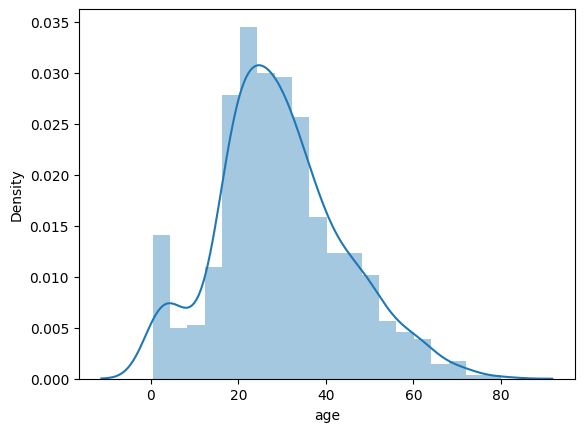

In [5]:
sns.distplot(df['age'])

In [6]:
df.age.isnull().sum()

np.int64(177)

In [9]:
df['Age_Mean'] = df['age'].fillna(df['age'].mean())

In [10]:
df[['Age_Mean','age']]

,Age_Mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


the above technique is used when our data is normally distributed

2- Median Value Imputation :- here the Nan value is replaced by the median of the data.
It is used when you have a outlier in your dataset.

In [11]:
df['Age_median'] = df['age'].fillna(df['age'].median())

In [12]:
df[['Age_median','Age_Mean','age']]

,Age_median,Age_Mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


3-Mode Value Imputation :- Categorical

In [14]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [15]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
df[df['age'].notna()]['embarked'].mode()[0]

'S'

In [20]:
mode = df[df['age'].notna()]['embarked'].mode()[0]

In [21]:
mode

'S'

In [22]:
df['embarked_mode'] = df['embarked'].fillna(mode)

In [24]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [25]:
df['embarked'].isnull().sum()

np.int64(2)